# Analiza skupień

Proszę dokonać klasteryzacji hierarchicznej (Matlab: linkage, Python: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)  na zbiorze seeds z UCI Machine Learning repository. Proszę wykreślić dendrogram (Matlab: dendrogram; Python: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html). Jaka wydaje się optymalna liczba klastrów? 
Dla klastrów proszę policzyć osobne średnie wartości atrybutów.
Poza tym proszę wykreślić wynik klasteryzacji na danych zredukowanych do dwóch wymiarów z kolorystycznym oznaczeniem klastrów (Matlab: https://www.mathworks.com/help/stats/gscatter.html ; Python: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) 
Proszę te same rozwiązania procesu klasteryzacji uzyskać z użyciem k-średnich (przy założeniu wybranej wartości k – zaobserwowanej w poprzednim kroku). 


### 1. 
Proszę dokonać klasteryzacji hierarchicznej (Matlab: linkage, Python: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) na zbiorze seeds z UCI Machine Learning repository. Proszę wykreślić dendrogram (Matlab: dendrogram; Python: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html). Jaka wydaje się optymalna liczba klastrów? 

In [1]:
import pandas as pd
df = pd.read_csv('seeds_dataset.txt', delimiter = "\t", header=None, names=["area A", "perimeter P", "compactness C = 4*pi*A/P^2", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "class"])
df

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [2]:
df.isnull().sum()

area A                        0
perimeter P                   0
compactness C = 4*pi*A/P^2    3
length of kernel              0
width of kernel               1
asymmetry coefficient         0
length of kernel groove       4
class                         4
dtype: int64

In [3]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [4]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df)
clustering
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 2.
Proszę wykreślić dendrogram (Matlab: dendrogram; Python: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html). Jaka wydaje się optymalna liczba klastrów? 

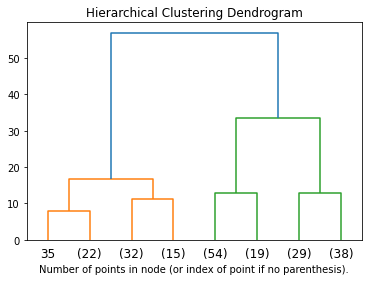

In [5]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = df

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### 3.
 Dla klastrów proszę policzyć osobne średnie wartości atrybutów. Poza tym proszę wykreślić wynik klasteryzacji na danych zredukowanych do dwóch wymiarów z kolorystycznym oznaczeniem klastrów (Matlab: https://www.mathworks.com/help/stats/gscatter.html ; Python: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) Proszę te same rozwiązania procesu klasteryzacji uzyskać z użyciem k-średnich (przy założeniu wybranej wartości k – zaobserwowanej w poprzednim kroku).

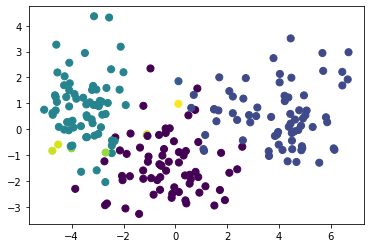

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
features = ['area A', 'perimeter P', 'compactness C = 4*pi*A/P^2', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class']

x = df.loc[:, features].values
principalComponents = pca.fit_transform(x)
X = principalComponents
Y = df['class']
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')


In [7]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    print("\nConverging centres:")
    while True:
        
        labels = pairwise_distances_argmin(X, centers)

        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        print('Mean')
        print(new_centers.mean())
        
        if np.all(centers == new_centers):
            break
        centers = new_centers

        print(centers)
        print()

    return centers, labels


Converging centres:
Mean
-0.10519710272909899
[[ 1.96551007 -0.40853308]
 [-3.41116159  0.53688186]
 [-3.09951081  3.78563093]]

Mean
-0.11202599625472305
[[ 2.46690085 -0.22675949]
 [-3.13339164 -0.01175321]
 [-2.82472243  3.05756993]]

Mean
-0.17338490792227304
[[ 2.84886829 -0.09246326]
 [-2.72619632 -0.35883114]
 [-3.1559312   2.44424418]]

Mean
-0.22726099469318137
[[ 3.12841972  0.01764226]
 [-2.28177741 -0.71968338]
 [-3.40421197  1.89604481]]

Mean
-0.1835401230437025
[[ 3.49025644  0.21402549]
 [-1.59370678 -1.05645908]
 [-3.6018478   1.44649099]]

Mean
-0.09685130517280564
[[ 3.76195852  0.37166205]
 [-0.88432212 -1.29987811]
 [-3.5844783   1.05395014]]

Mean
0.006477922418666478
[[ 4.02090068  0.4799716 ]
 [-0.598259   -1.26809362]
 [-3.56883789  0.97318577]]

Mean
0.062099905515216346
[[ 4.13238292  0.51745953]
 [-0.33766011 -1.26501365]
 [-3.49419837  0.81962912]]

Mean
0.08795823979846394
[[ 4.17152305  0.52073263]
 [-0.19433214 -1.27393764]
 [-3.43394332  0.73770685]]



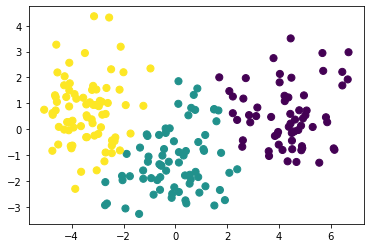

In [8]:
clust_num = 3
centers, labels = find_clusters(X, clust_num)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()